# Welcome to the `pysan` development notebook
This colab notebook is currently being tested as a workspace to develop new features. Code below is not deployment-ready, and is meant purely as a transparent way to see what kinds of features are in the works.

Note: this notebook is meant to be run on your local system after cloning the repository.

In [1]:
import sys
sys.path.insert(1,'../../')
import pysan as ps
import matplotlib.pyplot as plt

pysan ready


## Development Area
If the output of the previous cell reads `pysan ready.`, then everything is working and you're ready to go. Remember to leave lots of comments (and docstrings) so that anyone reading this page can understand what's going on!

AgglomerativeClustering(affinity='precomputed', distance_threshold=0,
                        linkage='average', n_clusters=None)


{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0], [0.0, 3.0, 3.0, 2.0]],
 'ivl': ['2', '0', '1'],
 'leaves': [2, 0, 1],
 'color_list': ['g', 'b']}

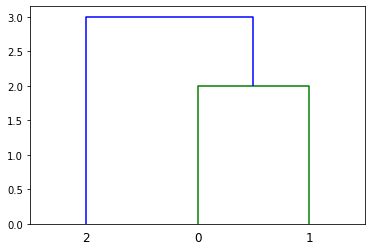

In [2]:
import pysan.core as pysan_core

sequences = ps.generate_sequences(5, 10, [1,2,3])

def get_statistics(sequences, function):
	
	
	scores = []
	for sequence in sequences:
		if function == 'entropy':
			scores.append(ps.get_entropy(sequence))
		elif function == 'complexity':
			scores.append(ps.get_complexity(sequence))
		elif function == 'turbulence':
			scores.append(ps.get_turbulence(sequence))
		else:
			scores.append(function(sequence))
	
	return scores

s1 = [1,1,1,2,2,3,3,3]
s2 = [1,1,3,2,2,3,1,3]
s3 = [1,1,2,2,3,2,3,2]

sequences = [s1,s2,s3]

get_statistics(sequences, ps.get_turbulence)


df = ps.get_transition_matrix(s1)

df = df.div(df.sum(axis=1), axis=0)

s1 = [1,2,3]

ps.get_subsequences(s1)

ps.get_combinatorial_distance(s1,s1)


model = ps.get_heirarchical_clustering(sequences, ps.get_optimal_distance)
print(model)
# plot the top three levels of the dendrogram
ps.plot_dendrogram(model, truncate_mode='level', p=3)

# a first order markov model is where some p+1 is dependent on p
# because it only uses p, it is said to be 'memoryless'

In [3]:
import pandas as pd

sample = ps.generate_sequences(50, 20, [1,2,3,4,5,6])
df = pd.DataFrame(sample, index=range(50), columns=['week_' + str(x + 1) for x in range(20)])
df.insert(0, 'id', range(50))
df.to_csv('example_sequences.csv', index=False)

<module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

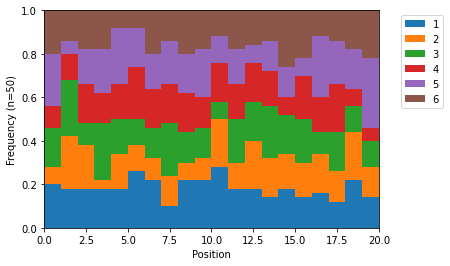

In [4]:

def read_csv(csv_file):
	
	df = pd.read_csv(csv_file)
	
	df.drop(df.columns[0], inplace=True, axis=1)
	
	return df.values.tolist()

s = read_csv('example_sequences.csv')
ps.plot_state_distribution(s)

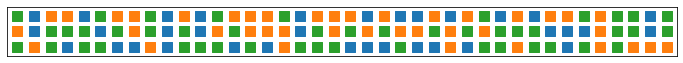

In [14]:
s = [ps.generate_sequence(40, [1,2,3]) for x in range(3)]
plt = ps.plot_sequences(s)
plt.gca().get_legend().remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig('banner.png', dpi=250, bbox_inches='tight')